<a href="https://colab.research.google.com/github/bernaberb/ML-Recursos-Humanos/blob/main/Data_Recursos_Humanos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obteniendo información sobre los recursos humanos de una empresa con Machine Learning 

Contratar y retener empleados son tareas complejas que requieren capital, tiempo y habilidades. En este proyecto intentaremos analizar la situación de una empresa ficticia y luego entrenar y aplicar un modelo que nos permita detectar cuando un empleado tiene alta probabilidad de renunciar a la empresa.


El proyecto fue realizado con [este dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) que tiene datos ficticios sobre casi 1500 empleados actuales y ex-empleados (que renunciaron), utilizando como base un análisis de [ProgrammerClick](https://programmerclick.com/article/61791075814/) y [un curso de Udemy](https://www.udemy.com/course/data-science-for-business-6-real-world-case-studies/).


---



### Librerías y dataset

In [2]:
# Importamos las librerías a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Montamos el drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Leemos el dataset

empleados_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mios Definitivos/Human_Resources.csv")

In [5]:
# Traemos algunos datos para ver cómo está presentado

empleados_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Traemos información sobre el dataframe

empleados_df.info()

# Vemos un total de 1470 entradas, cada una correspondiente a un empleado, y un total de 35 características

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                



---


### Visualización del dataset

**Reemplazamos las columnas 'Attritition', 'Over18 y 'Overtime' por enteros**

In [8]:
empleados_df['Attrition'] = empleados_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
empleados_df['OverTime'] = empleados_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
empleados_df['Over18'] = empleados_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [9]:
empleados_df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


-

**Vemos si nos faltan datos. Ningún dato falta.**

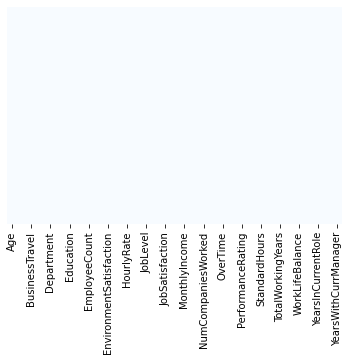

In [10]:
sns.heatmap(empleados_df.isnull(), yticklabels=False, cbar=False)

-

**Visualizamos los datos en un histograma**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56ef410dd0>,
      dtype=object)

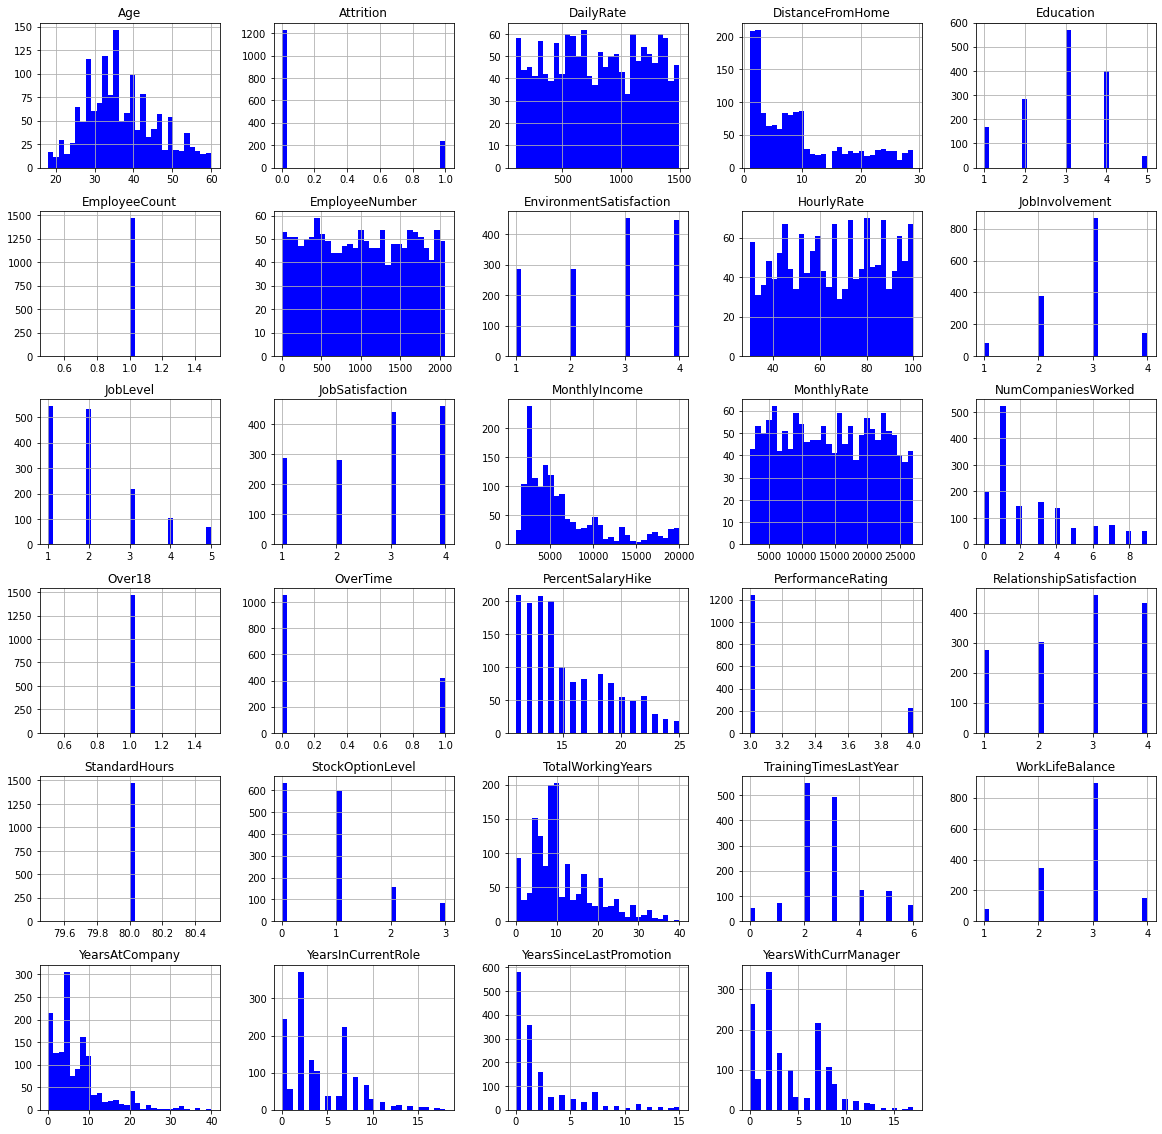

In [11]:
empleados_df.hist(bins = 30, figsize=(20,20), color = 'b')

-

**Eliminamos 'EmployeeCount' , 'Standardhours' y 'Over18' ya que tienen el mismo valor para todos los empleados(todos son empleados, trabajan la misma cantidad de horas y son mayores de 18 años)**

**Eliminamos 'EmployeeNumber' también, ya que no necesitamos identificar individualmente ningún empleado.**

In [12]:
empleados_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

--

**Veamos cuantos empleados de nuestro set dejaron la empresa. Esto viene dado por el campo "Attrition"**


In [13]:
seFueron_df   = empleados_df[empleados_df['Attrition'] == 1]
seQuedaron_df = empleados_df[empleados_df['Attrition'] == 0] 

In [153]:
print("Total de empleados = ", len(empleados_df))

print("Número de empleados que dejaron la empresa = ", len(seFueron_df))
print("Porcentaje de empleados que dejaron la empresa = ", "{:.2f}".format(1.*len(seFueron_df)/len(empleados_df)*100.0),"%")

print("Número de empleados que permanecen en la empresa = ", len(seQuedaron_df))
print("Porcentaje de empleados que permanecen en la empresa = ", "{:.2f}".format(1.*len(seQuedaron_df)/len(empleados_df)*100.0),"%")

Total de empleados =  1470
Número de empleados que dejaron la empresa =  237
Porcentaje de empleados que dejaron la empresa =  16.12 %
Número de empleados que permanecen en la empresa =  1233
Porcentaje de empleados que permanecen en la empresa =  83.88 %


-

**Estamos ante un conjunto de datos desequilibrado ya que tenemos mucha más información de empleados actuales que de empleados que abandonaron la empresa.**

-

**Vemos información estadística de los empleados que se fueron:**

In [15]:
seFueron_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


-

**Vemos información estadística de los empleados que se quedaron:**

In [16]:
seQuedaron_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**Podemos decir que, en promedio:**

* **Age:** la edad media de los empleados que se quedaron es mayor
* **DailyRate:** el salario diario de los empleados que se quedaron es mayor
* **DistanceFromHome:** los empleados que se quedaron viven más cerca del trabajo
* **EnvironmentSatisfaction & JobSatisfaction:** los empleados que se quedaron están más satisfechos con sus trabajos
* **StockOptionLevel:** Los empleados que se quedan tienen un mayor nivel de stocks options

-

**Visualizamos una matriz de correlaciones:**

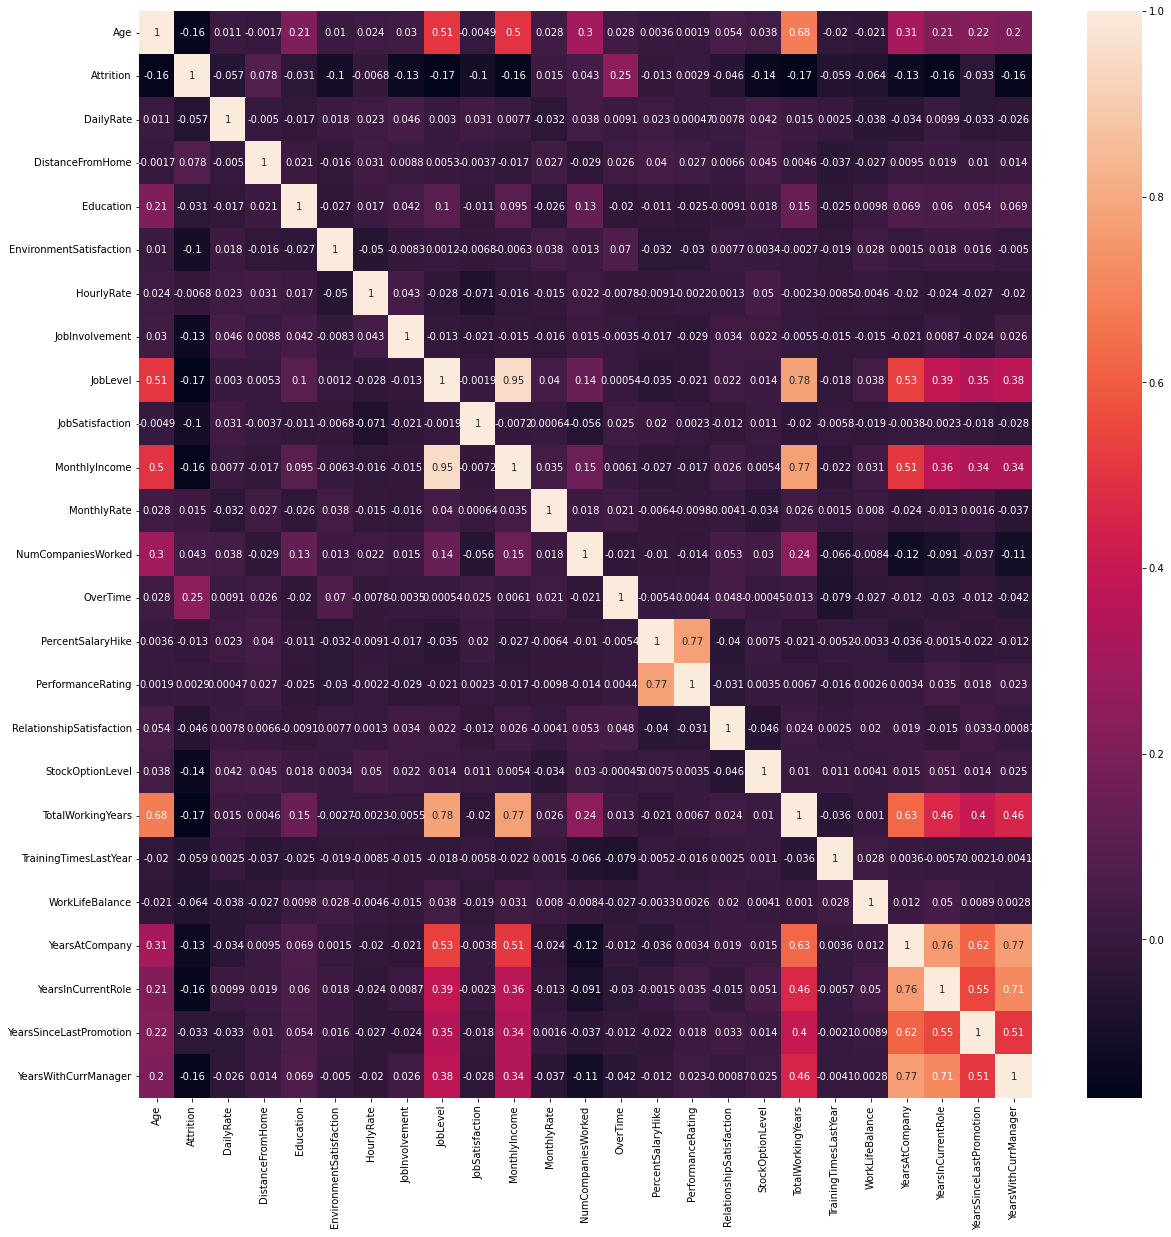

In [18]:
correlaciones = empleados_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlaciones, annot=True)

**Vemos algunas correlaciones:**

* **Job level** está altamente correlacionado con los **años de experiencia** (totales, dentro y fuera de la empresa)
* El **ingreso mensual** está altamente correlacionado con **Job level**
* El **ingreso mensual** está altamente correlacionado con los **años de experiencia** (totales, dentro y fuera de la empresa)
* El **ingreso mensual** está correlacionado con la **edad**

--

**Analicemos el abandono de la empresa en relación al puesto de trabajo, el estado civil, el compromiso con el trabajo y el nivel del trabajo:**

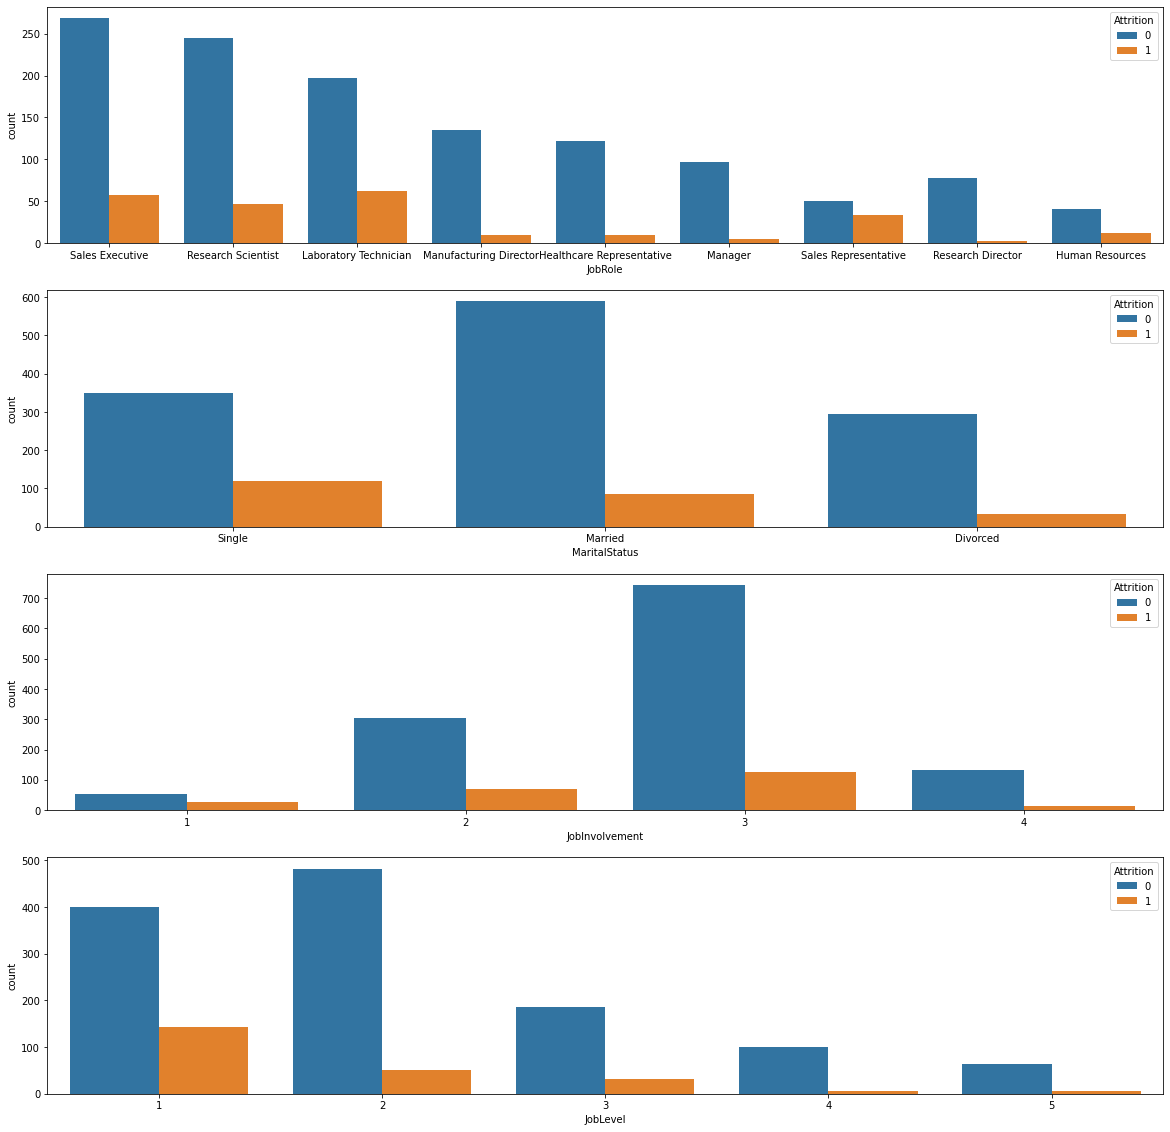

In [19]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = empleados_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = empleados_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = empleados_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = empleados_df)

-

**Podemos observar que:**
* Los **representantes de ventas** (sales representative) tienden a irse en comparación a los empleados del resto de los departamentos
* Los **empleados solteros** tienden a irse en comparación con los casados ​​y divorciados
* Los **empleados menos involucrados** (JobInvolvement) tienden a dejar la empresa
* Los **menos experimentados** (bajo JobLevel) tienden a dejar la empresa

Text(0.5, 0, 'Distancia desde la casa al trabajo (en KM)')

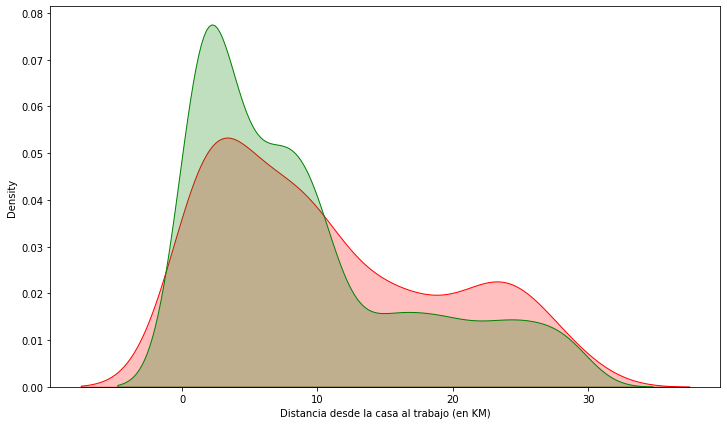

In [155]:
plt.figure(figsize=(12, 7))
sns.kdeplot(seFueron_df['DistanceFromHome'], label = "Empleados que se fueron", shade = True, color = 'r')
sns.kdeplot(seQuedaron_df['DistanceFromHome'], label = "Empleados que se quedaron", shade = True, color = 'g')
plt.xlabel('Distancia desde la casa al trabajo (en KM)')

**Podemos ver que cuanto más lejos del trabajo viven, más tienden a renunciar.**

-

Text(0.5, 0, 'Tiempo con el manager actual (en años)')

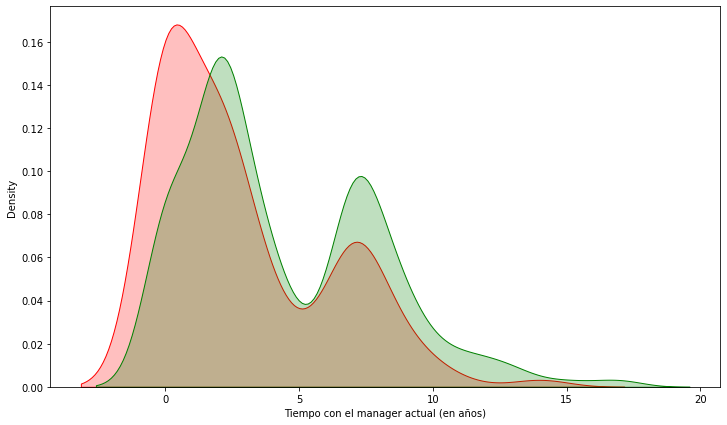

In [157]:
plt.figure(figsize=(12, 7))
sns.kdeplot(seFueron_df['YearsWithCurrManager'], label = "Empleados que se fueron", shade = True, color = 'r')
sns.kdeplot(seQuedaron_df['YearsWithCurrManager'], label = "Empleados que se quedaron", shade = True, color = 'g')
plt.xlabel('Tiempo con el manager actual (en años)')

**Vemos que muchos de los que se fueron tenían a su manager asignado reciéntemente.**

-

Text(0.5, 0, 'Número total de años trabajados')

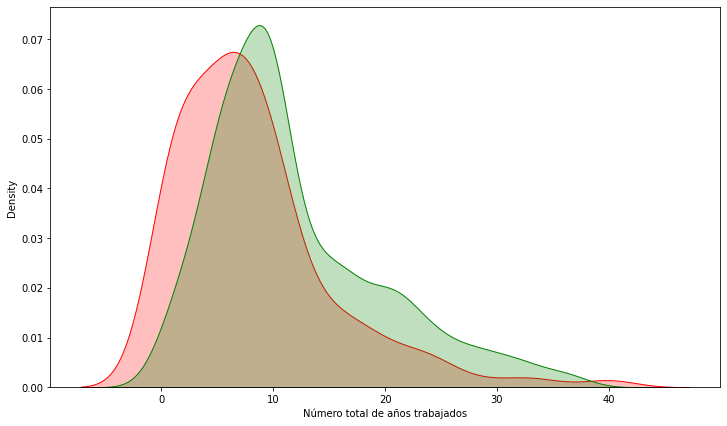

In [22]:
plt.figure(figsize=(12, 7))
sns.kdeplot(seFueron_df['TotalWorkingYears'], label = "Empleados que se fueron", shade = True, color = 'r')
sns.kdeplot(seQuedaron_df['TotalWorkingYears'], label = "Empleados que se quedaron", shade = True, color = 'g')
plt.xlabel('Número total de años trabajados')

--

**Veamos el género contra el ingreso mensual en un diagrama de caja y bigotes**

-

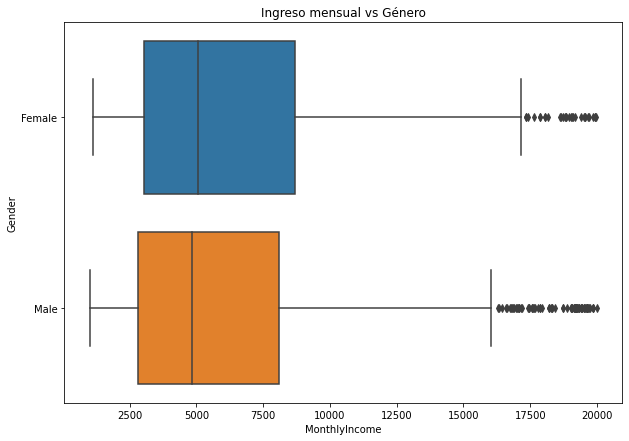

In [165]:
plt.figure(figsize=(10, 7))
plt.title("Ingreso mensual vs Género")
sns.boxplot(x='MonthlyIncome', y='Gender', data = empleados_df)



---



### Preparación de datos para el entrenamiento

**Nos quedamos con las características no-numéricas, para luego transformarlas en numéricas**

In [196]:
X_cat = empleados_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [197]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


-

**Transformamos los datos en números con OneHotEncoder. Crea una fila por cada valor de categoría y asigna un 1 ese valor se encuentra para esa entrada. Por ejemplo, si tenemos 'Gender' con valores 'Male' y 'Female', se crearán dos columnas y pondrá un 1 o un 0 según sea masculino o femenino.**

In [198]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

-

**Vemos como quedó. Nuestras 6 características se transformaron en 26 columnas**

In [199]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


-

**Tomamos las columnas que ya son numéricas. No tenemos en cuenta 'Attrition' ya que será la variable a predecir.**

In [200]:
# Nos quedamos del dataframe original con las categorías de valores numéricos, sin tener en cuenta el 'Attrition' que indicaba si está o no en la empresa.

X_numerical = empleados_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


-

**Concatenamos ambas, resultando ahora en todas columnas con datos numéricos.**

In [201]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


-

**Normalizamos todos los datos en una escala 0-1.**

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


-

**Listo, tenemos todos los datos listo para entrenar en X.**

In [ ]:
X

-

**Tomamos en 'y' sólo los valores de Attrition, nuestra variable a predecir**

In [204]:
y = empleados_df['Attrition']

y.shape

(1470,)

In [205]:
X.shape

(1470, 50)

---

### Entrenamos un clasificador utilizando regresión logística

In [177]:
# Recordemos que en X tenemos nuestros datos ya numéricos y en Y tenemos el valor que indica si abandonó la empresa

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

-

**Tenemos 1102 entradas de entrenamiento y 368 de testeo**

In [178]:
print(X_train.shape, X_test.shape)

(1102, 50) (368, 50)


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Usando el modelo de regresión logística
model = LogisticRegression()

# Entrenamos con nuestros datos
model.fit(X_train, y_train)

# Hacemos las predicciones de valor Y
y_pred = model.predict(X_test)

In [180]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

-

**Vemos qué tan acertada fue la predicción, comparando los valores estimados (y_pred) con los valores reales del conjunto de testeo (y_test)**

In [181]:
# Vemos qué tan acertada fue la predicción, comparándola con los valores reales de Y

print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 87.5 %


**Predijo correctamente el 87.5% de los casos.**

---



### ¡Listo! ahora lo usamos

**Suponemos ahora que tenemos una lista con 51 empleados que no formaron parte del set inicial y actualmente son parte de la empresa.**

**Podemos usar nuestro modelo para determinar si para alguno de ellos se predice un valor de Attrition '1', lo que puede  significar que hay un alto riesgo de que ese empleado abandone la empresa pronto.**

--

**Volvemos a moldear la información como la del set original para que le sea aplicable el modelo.**

In [182]:
nuevosPrueba_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mios Definitivos/Human_Resources_prueba.csv")

In [183]:
nuevosPrueba_df['Attrition'] = empleados_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
nuevosPrueba_df['OverTime'] = empleados_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [184]:
nuevosPrueba_df.drop(["StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

In [185]:
X_c = nuevosPrueba_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [186]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_c = onehotencoder.fit_transform(X_c).toarray()

In [ ]:
X_c = pd.DataFrame(X_c)

In [188]:
X_num = nuevosPrueba_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [189]:
X_todo = pd.concat([X_c, X_num], axis = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_todo)

-

**Tenemos nuestros 51 empleados listos en X para hacer las predicciones de Attrition.**

-

**Hacemos las predicciones de Y para estos nuevos datos**

In [191]:
y_pred = model.predict(X)

In [192]:
np.set_printoptions(threshold=np.inf)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

-

**Vamos a unir todo. Volvemos a cargar la base para mostrarlo con los valores originales (sin numerizar variables descriptivas, sin columnas eliminadas).**

-

**Luego a fines didácticos le agregamos a la base los nombres de estos 51 empleados**

-

**Finalmente agregamos el valor de Attrition a la tabla bajo el nombre 'RiesgoDeIrse'**

In [193]:
empTesteo_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mios Definitivos/Human_Resources_prueba.csv")

names = ['Jaume Kaur', 'Micaela Mestre', 'Joseba Penalva', 'Enrique Mir', 'Ignacio Puertas',
         'Ivan Silvestre', 'Juan Augurio', 'Myriam Morga', 'Carlos Pelique', 'Sofia Ruca',
         'Charly Garcia', 'Pascal Case', 'Rocio Moria', 'Cuqui Lopez', 'Charo Agres', 'Riba Mai',
         'Monica Araujo', 'Lucas Krapi', 'Lucila Rojo', 'Malena Cobre', 'Omar Omisten',
         'Lautaro Zana', 'Bernabe Ropa', 'Milagros Puni', 'Jorge Puri', 'Agustin Copa',
         'Ensi Sharp', 'Javier Castro', 'Aldana Cable', 'Clara Carpentier', 'Santiago Reu',
         'Romina Galvan', 'Federico Paz', 'Luz Antepo', 'Leonel Mosi', 'Fabiana Rommen',
         'Lima Loren', 'Lorenzo Carpo', 'Manuela Caper', 'Martin Keit', 'Mercedez Bons',
         'Quimey Mecha', 'Muriel Campos', 'Uriel Mezza', 'Carlos Port', 'Edgardo Rutt',
         'Edith Ponzo', 'Eliott Term', 'Cristina Ampo', 'Roque Sanz', 'Agustina Merin']

empTesteo_df['Name'] = names 

empTesteo_df['RiesgoDeIrse'] = y_pred

empTesteo_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Name,RiesgoDeIrse
0,41,No,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,Jaume Kaur,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,Micaela Mestre,0
2,37,No,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,Joseba Penalva,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,Enrique Mir,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,Ignacio Puertas,0


-

**Aplicamos un filtro y finalmente nos quedamos sólo con los empleados que pueden estar por abandonar la empresa**

In [194]:
enRiesgo = empTesteo_df['RiesgoDeIrse'] == 1
enRiesgo_df = empTesteo_df[enRiesgo]

enRiesgo_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Name,RiesgoDeIrse
42,26,No,Travel_Rarely,1357,Research & Development,150,3,Life Sciences,1,55,...,0,1,2,2,1,0,0,1,Muriel Campos,1


In [195]:
print(enRiesgo_df[['Name', 'RiesgoDeIrse']])

             Name  RiesgoDeIrse
42  Muriel Campos             1


### ¡Listo!

**Vemos que la empleada 'Muriel Campos' tiene, según nuestro modelo, alta probabilidad de estar por irse de la empresa. Podemos usar este dato para acercarnos a ella y ver su situación de manera personal.**